In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Importing data and viewing the dimensions of the data.

In [2]:
sales_data = pd.read_csv("./sales_data_sample.csv", encoding = "latin1")

# Displaying first few rows and basic info of the dataset.
sales_data.head(), sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


(   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
 0        10107               30      95.70                2  2871.00   
 1        10121               34      81.35                5  2765.90   
 2        10134               41      94.74                2  3884.34   
 3        10145               45      83.26                6  3746.70   
 4        10159               49     100.00               14  5205.27   
 
          ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
 0   2/24/2003 0:00  Shipped       1         2     2003  ...   
 1    5/7/2003 0:00  Shipped       2         5     2003  ...   
 2    7/1/2003 0:00  Shipped       3         7     2003  ...   
 3   8/25/2003 0:00  Shipped       3         8     2003  ...   
 4  10/10/2003 0:00  Shipped       4        10     2003  ...   
 
                     ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
 0        897 Long Airport Avenue           NaN            NYC    NY   
 1             59 rue de l'Abb

### Info about the above results
- The data has 2823 rows and 25 columns
- There are few features with missing values.
- Based on the above information, all of the features have their corresponding data type, except ORDERDATE.

# Exploratory Data Analysis

***** Sales Trend Analysis: *****

   YEAR_ID       SALES
0     2003  3516979.54
1     2004  4724162.60
2     2005  1791486.71

   YEAR_ID  QTR_ID       SALES
0     2003       1   445094.69
1     2003       2   562365.22
2     2003       3   649514.54
3     2003       4  1860005.09
4     2004       1   833730.68
5     2004       2   766260.73
6     2004       3  1109396.27
7     2004       4  2014774.92
8     2005       1  1071992.36
9     2005       2   719494.35

    YEAR_ID  MONTH_ID       SALES
0      2003         1   129753.60
1      2003         2   140836.19
2      2003         3   174504.90
3      2003         4   201609.55
4      2003         5   192673.11
5      2003         6   168082.56
6      2003         7   187731.88
7      2003         8   197809.30
8      2003         9   263973.36
9      2003        10   568290.97
10     2003        11  1029837.66
11     2003        12   261876.46
12     2004         1   316577.42
13     2004         2   311419.53
14     2004         

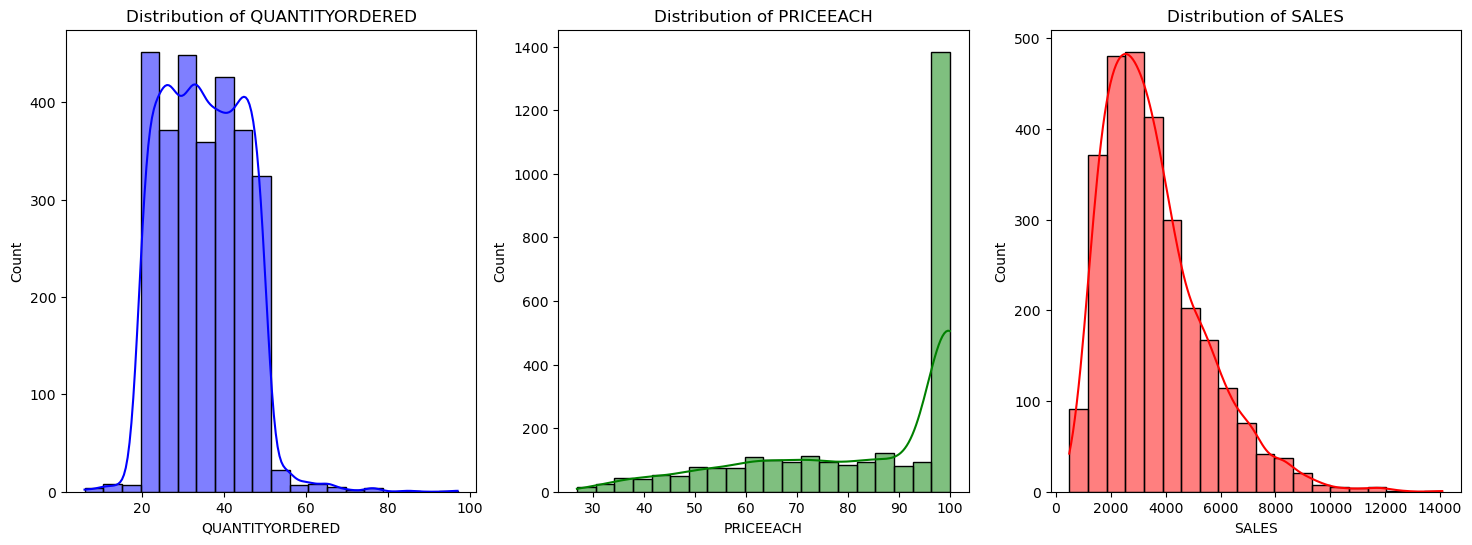

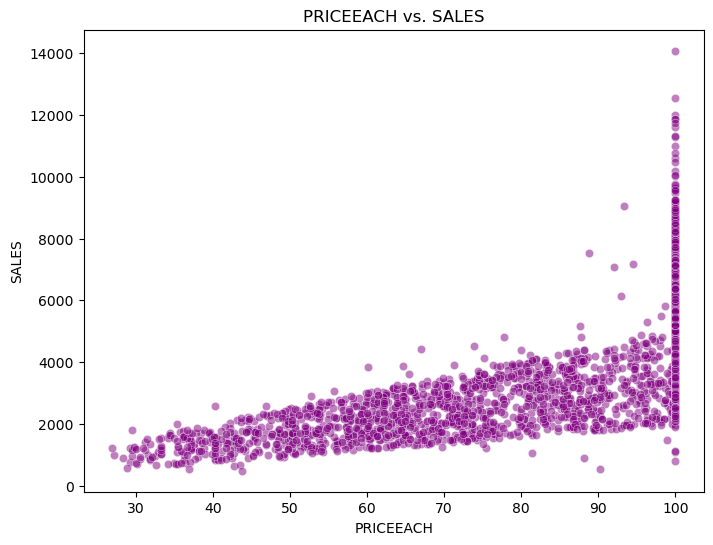

Correlation between PRICEEACH and SALES: 0.66


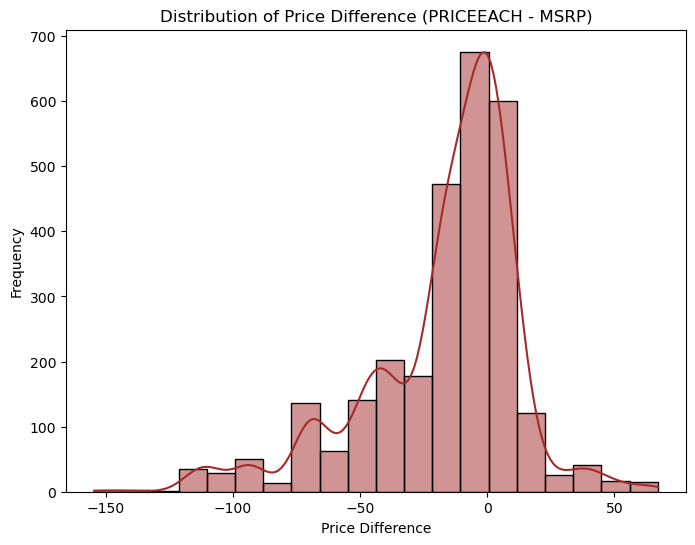

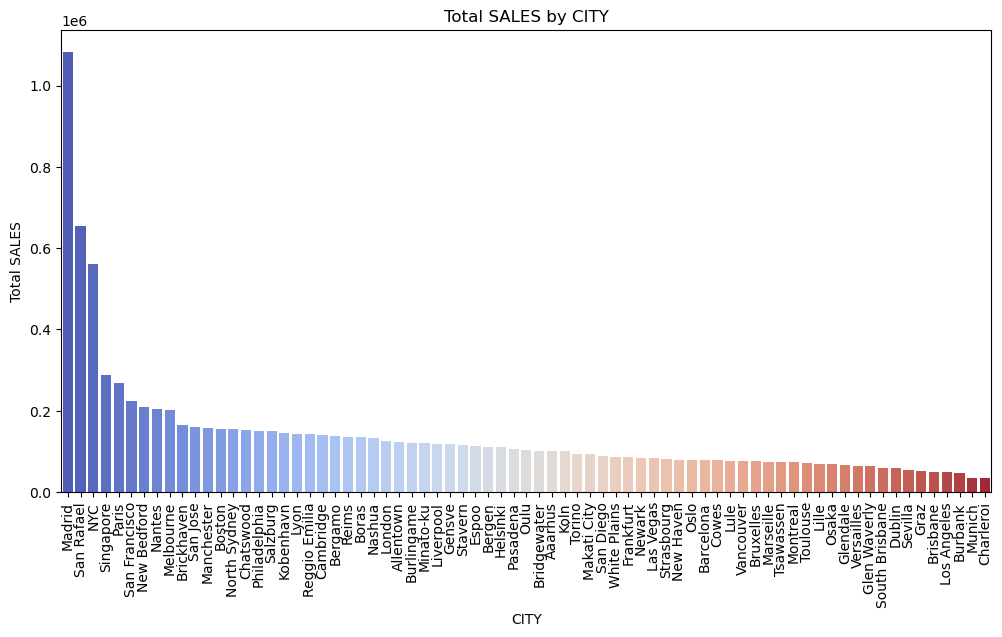

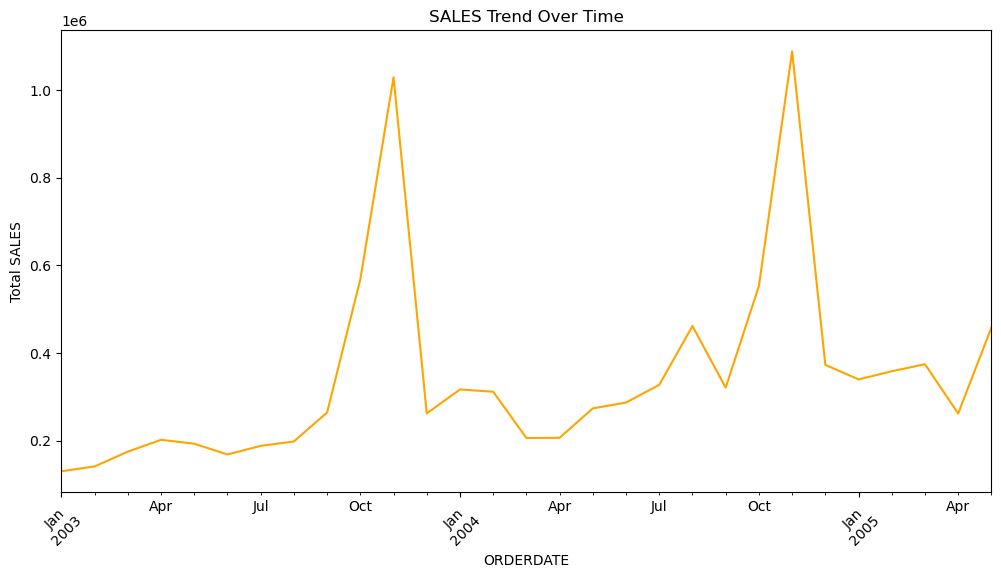

              CUSTOMERNAME  TOTAL_SALES  TOTAL_ORDERS MOST_COMMON_DEALSIZE  \
0           AV Stores, Co.    157807.81             3               Medium   
1             Alpha Cognac     70488.44             3               Medium   
2       Amica Models & Co.     94117.26             2                Small   
3  Anna's Decorations, Ltd    153996.13             4                Small   
4        Atelier graphique     24179.96             3               Medium   

  SALES_SEGMENT ORDER_FREQUENCY_SEGMENT  
0     Very High                  Medium  
1        Medium                  Medium  
2          high                     Low  
3     Very High                    high  
4           Low                  Medium  
   SALES_SEGMENT ORDER_FREQUENCY_SEGMENT MOST_COMMON_DEALSIZE  CUSTOMER_COUNT  \
0            Low                     Low               Medium               7   
1            Low                     Low                Small               9   
2            Low                  Me

In [24]:
def perform_eda(data):
    # Copy of the data.
    df_copy = data.copy()
    
    # Converting data types, based on necessary features.
    df_copy["ORDERDATE"] = pd.to_datetime(df_copy["ORDERDATE"], errors = "coerce")
    
    # Aggregate Sales by year, quarter, and month.
    sales_by_year = df_copy.groupby("YEAR_ID")["SALES"].sum().reset_index()
    sales_by_quarter = df_copy.groupby(["YEAR_ID", "QTR_ID"])["SALES"].sum().reset_index()
    sales_by_month = df_copy.groupby(["YEAR_ID", "MONTH_ID"])["SALES"].sum().reset_index()
    
    # Identify top-selling products and categories
    top_products = df_copy.groupby("PRODUCTCODE")["SALES"].sum().sort_values(ascending = False).reset_index().head(10)
    top_categories = df_copy.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending = False).reset_index().head(10)
    
    sales = [sales_by_year, sales_by_quarter, sales_by_month]
    print("***** Sales Trend Analysis: *****\n")
    for i in sales:
        print(f"{i}\n")
    print(" * " * 12)
    
    top_prod_cat = [top_products, top_categories]
    print("\n***** Top products and categories: *****\n")
    for i in top_prod_cat:
        print(f"{i}\n")
    print(" * " * 12)
    
    # Distribution of QUANTITYORDERED, PRICEEACH, SALES.
    fig, axes = plt.subplots(1, 3, figsize = (18, 6))
    sns.histplot(df_copy["QUANTITYORDERED"], bins = 20, kde = True, ax = axes[0], color = "blue").set(title = "Distribution of QUANTITYORDERED")
    sns.histplot(df_copy["PRICEEACH"], bins = 20, kde = True, ax = axes[1], color = "green").set(title = "Distribution of PRICEEACH")
    sns.histplot(df_copy["SALES"], bins = 20, kde = True, ax = axes[2], color = "red").set(title = "Distribution of SALES")
    plt.show()
    
    # Relationship between PRICEEACH and SALES.
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x = "PRICEEACH", y = "SALES", data = df_copy, alpha = 0.5, color = "purple")
    plt.title("PRICEEACH vs. SALES")
    plt.xlabel("PRICEEACH")
    plt.ylabel("SALES")
    plt.show()
    
    # Correlation between PRICEEACH and SALES.
    correlation = df_copy["PRICEEACH"].corr(df_copy["SALES"])
    print(f"Correlation between PRICEEACH and SALES: {correlation:.2f}")
    
    # Price difference between PRICEEACH and MSRP.
    df_copy["PriceDiff"] = df_copy["PRICEEACH"] - df_copy["MSRP"]
    plt.figure(figsize = (8,6))
    sns.histplot(df_copy["PriceDiff"], bins = 20, kde = True, color = "brown").set(title = "Distribution of Price Difference (PRICEEACH - MSRP)", xlabel = "Price Difference", ylabel = "Frequency")
    plt.show()
    
    # Sales by CITY.
    plt.figure(figsize = (12, 6))
    sales_by_city = df_copy.groupby("CITY")["SALES"].sum().sort_values(ascending = False)
    sns.barplot(x = sales_by_city.index, y = sales_by_city.values, palette = "coolwarm").set(title = "Total SALES by CITY", xlabel = "CITY", ylabel = "Total SALES")
    plt.xticks(rotation = 90)
    plt.show()
    
    # Sales trends over time.
    plt.figure(figsize = (12, 6))
    df_copy['Date'] = pd.to_datetime(df_copy['YEAR_ID'].astype(str) + '-' + df_copy['MONTH_ID'].astype(str) + '-01')
    sales_trends = df_copy.groupby("Date")["SALES"].sum()
    sales_trends.plot(color = "orange").set(title = "SALES Trend Over Time", xlabel = "ORDERDATE", ylabel = "Total SALES")
    plt.xticks(rotation = 45)
    plt.show()
    
    # Custamer Segmentation
    # Aggregate customer sales data
    customer_sales = df_copy.groupby("CUSTOMERNAME").agg({
        "SALES": "sum",
        "ORDERNUMBER": "nunique",
        "DEALSIZE": lambda x: x.mode()[0]
    }).reset_index()
    
    # Renaming columns for clarity
    customer_sales.columns = ["CUSTOMERNAME", "TOTAL_SALES", "TOTAL_ORDERS", "MOST_COMMON_DEALSIZE"]
    
    # Determining key customer segments using quantiles for sales volume and frequency
    customer_sales["SALES_SEGMENT"] = pd.qcut(customer_sales["TOTAL_SALES"], 4, labels = ["Low", "Medium", "high", "Very High"], duplicates = "drop")
    
    # calculating unique quantiles for TOTAL_ORDERS
    order_quantiles = customer_sales["TOTAL_ORDERS"].quantile([0, 0.25, 0.5, 0.75, 1.0]).unique()
    order_labels = ["Low", "Medium", "high", "Very High"][:len(order_quantiles) - 1]
    
    # Ensure number of labels match number of bins - 1
    customer_sales["ORDER_FREQUENCY_SEGMENT"] = pd.cut(customer_sales["TOTAL_ORDERS"], bins = order_quantiles, labels = order_labels, include_lowest = True)
    
    # Summarize the key customer segments
    segment_summary = customer_sales.groupby(["SALES_SEGMENT", "ORDER_FREQUENCY_SEGMENT", "MOST_COMMON_DEALSIZE"]).agg({
        "CUSTOMERNAME": "count",
        "TOTAL_SALES": "mean",
        "TOTAL_ORDERS": "mean"
    }).reset_index()
    
    
    # Rename columns for clarity.
    segment_summary.columns = ["SALES_SEGMENT", "ORDER_FREQUENCY_SEGMENT", "MOST_COMMON_DEALSIZE", "CUSTOMER_COUNT", "AVG_TOTAL_SALES", "AVG_TOTAL_ORDERS"]
    
    # PRINTING OUT THE RESULTS.
    print(customer_sales.head())
    print(segment_summary)

perform_eda(sales_data)